[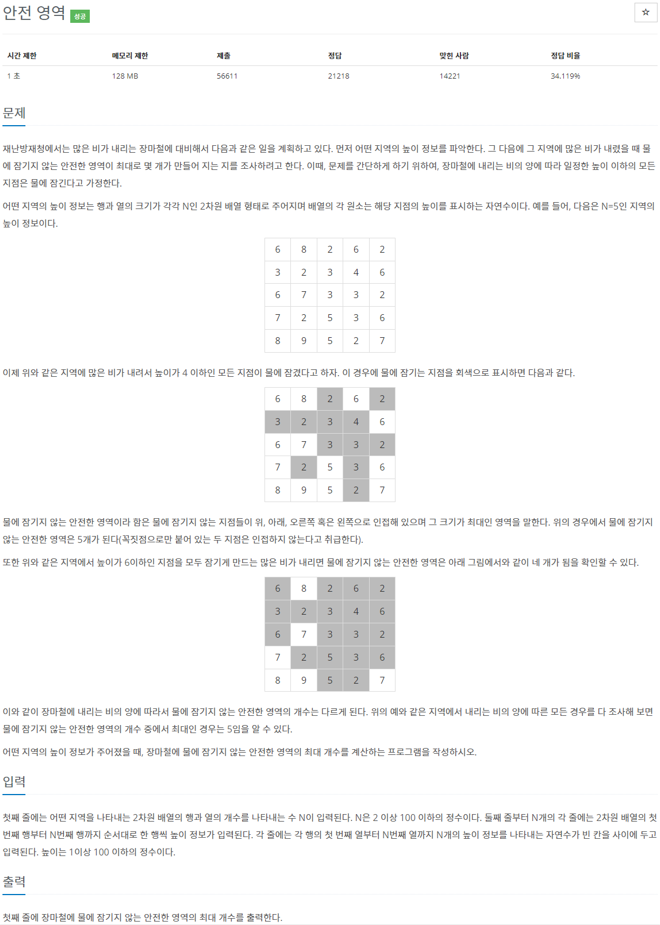](https://www.acmicpc.net/problem/2468)

In [ ]:
import sys
from copy import deepcopy
sys.setrecursionlimit(10**6)

input = sys.stdin.readline


def dfs(i, j, cities):    # 기존의 인접숫자 전부 0으로 바꾸기
    cities[i][j] = 0
    for di, dj in [[-1, 0], [0, -1], [0, 1], [1, 0]]:
        ni, nj = i + di, j + dj
        if 0 <= ni < n and 0 <= nj < n and cities[ni][nj] != 0:
            dfs(ni, nj, cities)


def f(x):
    cnt = 0
    cities = deepcopy(arr)
    for i in range(n):    # 강수량 이하인 부분 전부 0으로 바꿔보기
        for j in range(n):
            if cities[i][j] <= x:
                cities[i][j] = 0
    for i in range(n):   # 0이 아닌 부분의 인접을 전부 0으로 바꾸자
        for j in range(n):
            if cities[i][j] != 0:
                dfs(i, j, cities)
                cnt += 1
    return cnt


n = int(input())
arr = [list(map(int, input().rstrip().split())) for _ in range(n)]
maxV = 0
for i in range(n):      # 최대 강수량 확인하기
    for j in range(n):
        if arr[i][j] > maxV:
            maxV = arr[i][j]

ans = []
for i in range(maxV):
    ans.append(f(i))     # 언제가 최대일지 몰라 


print(max(ans))

---

섬의 갯수 세는 것처럼 dfs 돌며 인접한 부분을 0으로 모두 바꾸며 단계 한 번 당 count 하면 전체 섬의 갯수 출력 가능하지만<br>
물이 잠기는 높이가 바뀌는 것에 대한 적응을 하고자 deepcopy 를 이용하여 복사본배열을 수정함.
